Logistic regression for a binary classification
---

---
1. training data

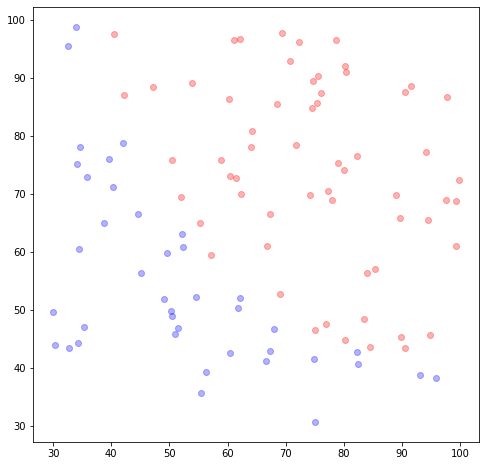

In [590]:
import numpy as np
import matplotlib.pyplot as plt
data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

- load data.txt we can get {x, y, l} datas
- x, y $\in$ $R$ and l $\in$ {0, 1}

---
2. Logistic regression

In [0]:
def ret_z(theta_0, theta_1, theta_2, x, y):
  """
  make z function using thetas and x, y data
  params
  if (x, y) is inputed, it will return z of thetas
  theta_0 : scalar 
  theta_1 : scalar
  theta_2 : scalar
  x       : (100,)
  y       : (100,)

  return  : (100,) by the broadcasting of numpy 
  """
  z = theta_0 + theta_1 * x + theta_2 * y 
  return z 

- make ret_z fucntion which returns a linear combination of x and y and thetas.

In [0]:
def hypothesis(z):
  """
  make sigmoid using z function
  params
  z      : (100,)
  return sigmoid of z (100,)
  """
  sigmoid = 1 / (1 + np.exp(-1 * z))
  return sigmoid

- make hypothesis function that returns sigmoid of z. 

In [0]:
def binary_cross_entropy_loss (theta_0, theta_1, theta_2, x, y, l):
  """
  make bce loss for dataset and thetas
  params
  theta_0 : scalar - trainable parameter
  theta_1 : scalar - trainable parameter
  theta_2 : scalar - trainable parameter
  x       : (100, ) - train x data
  y       : (100, ) - train y data
  l       : (100, ) - 0 or 1 labels
  return 
  loss    : scalar - bce loss for thetas and data.
  """
  m = len(x) # 100
  z = ret_z(theta_0, theta_1, theta_2, x, y) # (100, )
  h = hypothesis(z)                          # (100, )

  loss = np.sum(-l * np.log(h) - (1-l) * np.log(1 - h)) / m  # scalar
  return loss

- make bce loss for $\sigma(z)$ and labels.

In [0]:
def gradient_descent(x, y, l, theta_0, theta_1, theta_2, learning_rate=1e-5):
  """
  make gradient descent algorithm for logistic regression.
  params
  x             : (100, ) - train x data
  y             : (100, ) - train y data
  l             : (100, ) - 0 or 1 labels
  theta_0       : scalar - trainable parameter
  theta_1       : scalar - trainable parameter
  theta_2       : scalar - trainable parameter
  learning_rate : scalar - learning rate s.t. step size for GD algorithm.
  return 
  new thetas_0  : scalar - updated param
  new thetas_1  : scalar - updated param
  new thetas_2  : scalar - updated param
  """
  m = len(x)  

  z = ret_z(theta_0, theta_1, theta_2, x, y)
  h = hypothesis(z)

  gradient_theta_0 = np.sum(h - l) / m
  gradient_theta_1 = np.sum((h - l) * x) / m
  gradient_theta_2 = np.sum((h - l) * y) / m

  # print("gd : ", gradient_theta_0)

  new_theta_0 = theta_0 - learning_rate * gradient_theta_0
  new_theta_1 = theta_1 - learning_rate * gradient_theta_1
  new_theta_2 = theta_2 - learning_rate * gradient_theta_2

  return new_theta_0, new_theta_1, new_theta_2

- make gradient descent algorithm for logistic regression.

In [0]:
# logistic regression process

# initialize thetas arbitrarily
theta_0 = 0.05
theta_1 = 0.1
theta_2 = 0.25

theta_0_list = []
theta_1_list = []
theta_2_list = []

loss_list = []

# until converge about 5000 steps
converge_step = 5000
for i in range(converge_step):

  loss = binary_cross_entropy_loss(theta_0, theta_1, theta_2, x, y, label)
  loss_list.append(loss)

  theta_0_list.append(theta_0)
  theta_1_list.append(theta_1)
  theta_2_list.append(theta_2)
  theta_0, theta_1, theta_2 = gradient_descent(x, y, label, theta_0, theta_1, theta_2)
  

- initialize thetas arbitrarily and logistic regress for binary label and data
- using the gradient descent algorithm
- converge step is 5000

---
3. plot the estimated parameters using the training dataset

In [0]:
import matplotlib.pyplot as plt
x_ = np.arange(converge_step)

- define x_ to plot along with steps

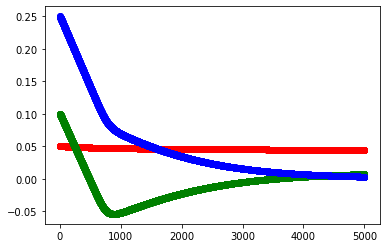

In [597]:
plt.scatter(x_, theta_0_list, c='r')
plt.scatter(x_, theta_1_list, c='g')
plt.scatter(x_, theta_2_list, c='b')
plt.show()

- plotting estimated parameters

---
4.  plot the training error

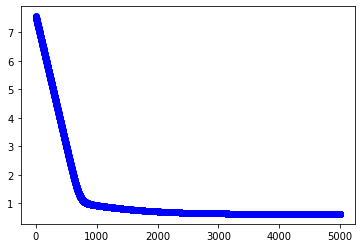

In [598]:
plt.scatter(x_, loss_list, c='b')
plt.show()

- plot the training error

---
5. plot the obtained classifier

In [0]:
# define plot's ranges.
x_range = np.arange(30, 100, 0.5)
y_range = np.arange(30, 100, 0.5)

x_list = []
y_list = []
cls_list = []
color_list = []

for x_tip in x_range:
  for y_tip in y_range:
    x_list.append(x_tip)
    y_list.append(y_tip)

    z = ret_z(theta_0_list[2000], theta_1_list[2000], theta_2_list[2000], x_tip, y_tip)
    h = hypothesis(z)
    cls_list.append(h)

- define plot's ragne
- make $\sigma(z)$ list (as cls_list) to plot at x, y ranges.
- make color list to paint classifier by weighted combination for their labels.

In [0]:
import matplotlib
norm = plt.Normalize(0,1)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","red"])

- make color map where blue is used for 0, red is used for 1, with their linear interpolations.

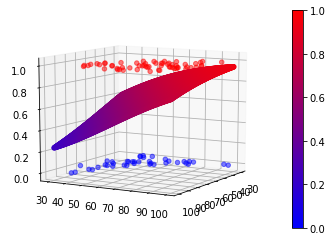

In [601]:
fig = plt.figure('3d plots')
ax = fig.gca(projection='3d')

p = ax.scatter(x_list, y_list, cls_list, c=cls_list, alpha=1, cmap=cmap, norm=norm)
# plot tarining data points
ax.scatter(x_label0, y_label0, 0, alpha=0.5, color='b')
ax.scatter(x_label1, y_label1, 1, alpha=0.5, color='r')
ax.view_init(10, 30)

fig.colorbar(p, ax=ax)
plt.show()

- plot the obtained classifier 